## Observations and Insights 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint as pprint
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
display(merge_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())
   

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#make a list duplicate ids 
duplicate_ids=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_ids


array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mouse = merge_df[merge_df['Mouse ID'].isin(duplicate_ids)]

In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[~merge_df['Mouse ID'].isin(duplicate_ids)]
clean_df['Mouse ID'].nunique()

248

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_df.head()


mean_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().reset_index()
mean_df.columns = ["Drug Regimen","mean"]

median_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().reset_index()
median_df.columns = ["Drug Regimen","median"]

combined_summary_df = pd.merge(mean_df, median_df, on=["Drug Regimen"])

var_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().reset_index()
var_df.columns = ["Drug Regimen","var"]
combined_summary_df = pd.merge(combined_summary_df, var_df, on=["Drug Regimen"])

std_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().reset_index()
std_df.columns = ["Drug Regimen","std"]
combined_summary_df = pd.merge(combined_summary_df, std_df, on=["Drug Regimen"])

sem_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().reset_index()
sem_df.columns = ["Drug Regimen","sem"]
combined_summary_df = pd.merge(combined_summary_df, sem_df, on=["Drug Regimen"])

combined_summary_df

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_df
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"]).reset_index()

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

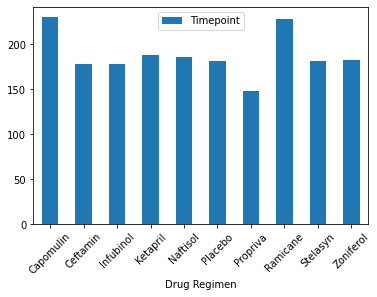

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Bar_DF = clean_df.groupby("Drug Regimen")["Timepoint"].count().reset_index()
ax = Bar_DF.plot.bar(x='Drug Regimen', y='Timepoint', rot=45)


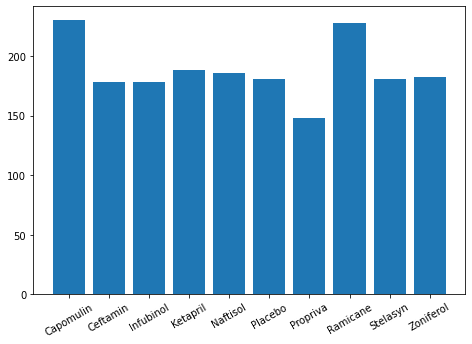

In [91]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Bar_DF['Drug Regimen'],Bar_DF['Timepoint'])
plt.xticks(rotation=30)
plt.show()


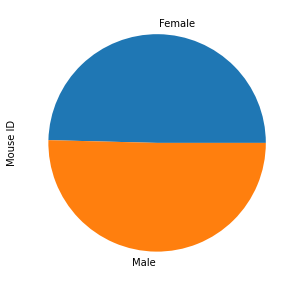

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df.groupby("Sex")["Mouse ID"].nunique()


plot = mice_sex.plot.pie(y='Sex', figsize=(5, 5))


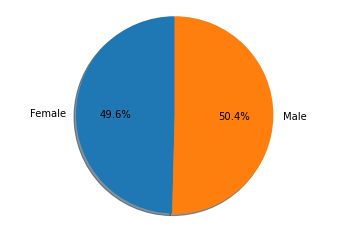

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex=mice_sex.reset_index()
mice_sex
fig1, ax1 = plt.subplots()
ax1.pie(mice_sex['Mouse ID'],  labels=mice_sex['Sex'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_tumor = pd.merge(max_time, clean_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']], on=["Mouse ID","Timepoint"])

#subset for four treatment regimens
max_time_tumor_subset = max_time_tumor[max_time_tumor['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
max_time_tumor_subset

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
3,a275,45,Ceftamin,62.999356
6,a411,45,Ramicane,38.407618
7,a444,45,Ramicane,43.047543
...,...,...,...,...
238,y769,45,Ceftamin,68.594745
239,y793,45,Capomulin,31.896238
240,y865,45,Ceftamin,64.729837
244,z578,45,Ramicane,30.638696


In [83]:
tmp_list = max_time_tumor_subset['Tumor Volume (mm3)'][max_time_tumor_subset['Drug Regimen']=='Capomulin']
q3, q1 = np.percentile(tmp_list, [75 ,25])
q1, q3
tmp_list[(tmp_list<=q1) | (tmp_list >=q3)]

61     30.485985
66     40.159220
80     47.685963
108    41.483008
121    28.430964
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
192    31.023923
204    40.658124
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in treat_list:

    tmp_list = max_time_tumor_subset['Tumor Volume (mm3)'][max_time_tumor_subset['Drug Regimen']==treat]
    vol_data = vol_data.append(tmp_list)
    q3, q1 = np.percentile(tmp_list, [75 ,25])
    q1, q3
    tmp_list[(tmp_list<=q1) | (tmp_list >=q3)]

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin         AxesSubplot(0.1,0.559091;0.363636x0.340909)
Ceftamin     AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Infubinol             AxesSubplot(0.1,0.15;0.363636x0.340909)
Ramicane         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

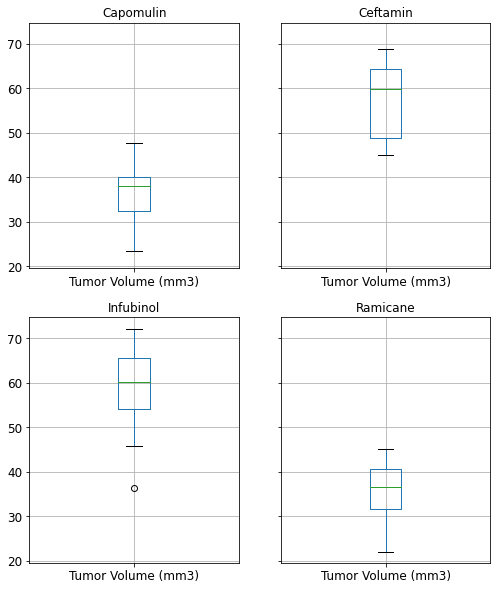

In [86]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import itertools
grouped = max_time_tumor_subset[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen')
grouped.boxplot(rot=0, fontsize=12, figsize=(8,10)) 

## Line and Scatter Plots

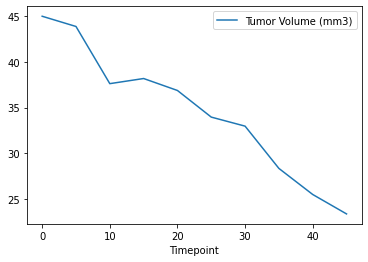

In [105]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#s185=mouse id 
s185_df=clean_df[clean_df['Mouse ID']=='s185']
lines = s185_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

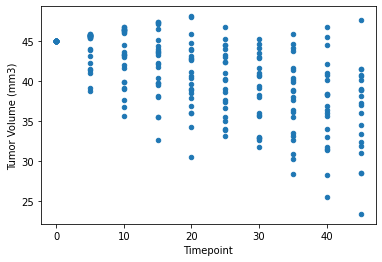

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df= clean_df[clean_df['Drug Regimen']=='Capomulin']
scatter = scatter_df.plot.scatter(x='Timepoint', y='Tumor Volume (mm3)')

## Correlation and Regression

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_df[['Timepoint','Tumor Volume (mm3)' ]].corr()

,Timepoint,Tumor Volume (mm3)
Timepoint,1.000000,-0.584271
Tumor Volume (mm3),-0.584271,1.000000
